### 라이브러리, 데이터 셋 임포트

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 651s 4us/step


### 영상 화면 표시

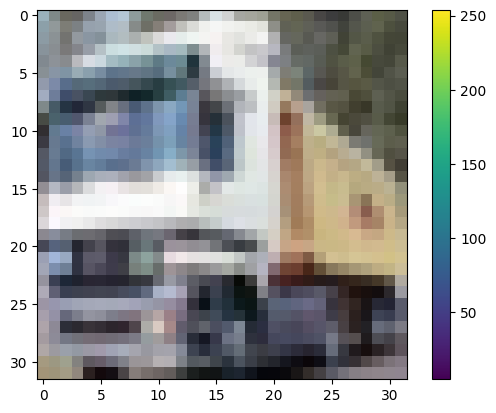

In [2]:
# 두 번째 영상을 화면에 표시
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.show()

### 신경망 모델 구축

In [3]:
X_train = X_train/255.0
X_test = X_test/255.0

# 순차 모델
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [4]:
# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [5]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 48s 42ms/step - loss: 1.4987 - accuracy: 0.4622 - val_loss: 1.2963 - val_accuracy: 0.5485
Epoch 2/10
1094/1094 [==============================] - 54s 49ms/step - loss: 1.1610 - accuracy: 0.5917 - val_loss: 1.1239 - val_accuracy: 0.6069
Epoch 3/10
1094/1094 [==============================] - 54s 49ms/step - loss: 1.0103 - accuracy: 0.6449 - val_loss: 1.0751 - val_accuracy: 0.6235
Epoch 4/10
1094/1094 [==============================] - 54s 50ms/step - loss: 0.9111 - accuracy: 0.6828 - val_loss: 1.0246 - val_accuracy: 0.6442
Epoch 5/10
1094/1094 [==============================] - 54s 50ms/step - loss: 0.8332 - accuracy: 0.7092 - val_loss: 1.0058 - val_accuracy: 0.6516
Epoch 6/10
1094/1094 [==============================] - 54s 50ms/step - loss: 0.7589 - accuracy: 0.7333 - val_loss: 1.0521 - val_accuracy: 0.6458
Epoch 7/10
1094/1094 [==============================] - 54s 50ms/step - loss: 0.6847 - accuracy: 0.7603 - val_loss: 1.0642 -

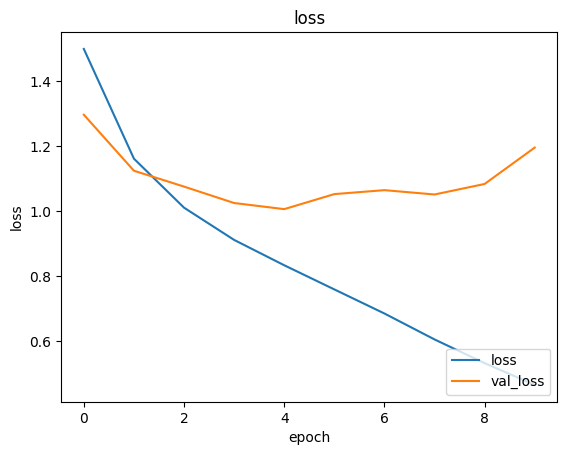

In [6]:
# 손실값 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

### 테스트

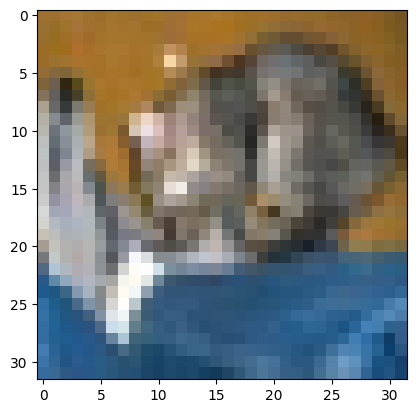

313/313 [==============================] - 3s 7ms/step
정답= [3]
예측값= [2.2030157e-05 1.9295512e-05 2.0510211e-05 9.7937453e-01 9.5723575e-05
 1.9407582e-02 5.4342923e-04 4.5329107e-06 3.4614965e-05 4.7776554e-04]


In [7]:
plt.figure()
plt.imshow(X_test[0])
plt.show()
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])